In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

In [2]:
df1 = pd.read_csv("./data/gct_20250824_211810/gct_20250824_211810_total.csv")
df1

,tile_idx,lat,lng,id,bicycle_id,scooter_number,region_id,region_name,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,model_info_name,movable_distance_value,movable_distance_unit,movable_distance_display_value,collected_time
0,1,37.500503,127.062787,79225,79225.0,617227.0,560,(본사직영)_서울_강남_대치,True,63.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 21:18:11
1,1,37.499793,127.066016,89944,89944.0,608040.0,560,(본사직영)_서울_강남_대치,True,26.0,IDLE,False,18.0,GCOO-B2,7.0,km,7km,2025-08-24 21:18:11
2,1,37.505855,127.054810,80098,80098.0,616167.0,557,(본사직영)_서울_강남_삼성,True,56.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
3,1,37.495239,127.053140,106138,106138.0,623053.0,560,(본사직영)_서울_강남_대치,True,55.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
4,1,37.497746,127.055042,91621,91621.0,612991.0,560,(본사직영)_서울_강남_대치,True,73.0,IDLE,True,18.0,GCOO-B2,21.0,km,21km,2025-08-24 21:18:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943347,119,37.472501,126.963108,117860,117860.0,638103.0,961,(본사직영)_서울_관악,True,53.0,IDLE,False,18.0,GCOO-B2,15.0,km,15km,2025-08-24 23:36:05
943348,119,37.477570,126.972465,118253,118253.0,638885.0,962,(본사직영)_서울_동작,True,75.0,IDLE,False,18.0,GCOO-B2,22.0,km,22km,2025-08-24 23:36:05
943349,119,37.473370,126.968801,118334,118334.0,638148.0,961,(본사직영)_서울_관악,True,88.0,IDLE,False,18.0,GCOO-B2,26.0,km,26km,2025-08-24 23:36:05
943350,119,37.472681,126.964256,117713,117713.0,638198.0,961,(본사직영)_서울_관악,True,61.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 23:36:05


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943352 entries, 0 to 943351
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tile_idx                        943352 non-null  int64  
 1   lat                             943352 non-null  float64
 2   lng                             943352 non-null  float64
 3   id                              943352 non-null  object 
 4   bicycle_id                      933433 non-null  float64
 5   scooter_number                  933433 non-null  float64
 6   region_id                       943352 non-null  int64  
 7   region_name                     943352 non-null  object 
 8   is_activated                    933433 non-null  object 
 9   battery                         933433 non-null  float64
 10  gcooter_status                  933433 non-null  object 
 11  is_discount_scooter             933433 non-null  object 
 12  model_info_id   

## id의 discount_spots 가 무엇인가?
- 확인 결과 scooter_number가 모두 없으므로 기기가 아님을 확인 -> 삭제 (실제로 ‘지쿠 파킹존’ 임. 200원 할인 혜택)

In [4]:
df1[df1['id'].astype(str).str.contains('discount', case=False)][['id','scooter_number']].sort_values(by='id')

,id,scooter_number
836975,discount_spots_7406,NaN
706853,discount_spots_7406,NaN
418322,discount_spots_7406,NaN
141777,discount_spots_7406,NaN
106378,discount_spots_7406,NaN
...,...,...
689451,discount_spots_8225,NaN
424527,discount_spots_8225,NaN
165690,discount_spots_8225,NaN
71240,discount_spots_8225,NaN


In [5]:
# 전체 종류수
df1[df1['id'].astype(str).str.contains('discount', case=False)][['id','scooter_number']].nunique()

id                62
scooter_number     0
dtype: int64

In [6]:
df1['id'].nunique()

6101

# df2: discount_spots 로 시작하는 id들 삭제

In [7]:
# df2: discount_spots 로 시작하는 id들 삭제
df2 = df1[~df1['id'].astype(str).str.contains('discount', case=False)].reset_index(drop=True)
df2.to_csv("./data/gct_20250824_211810/mid/gct_df2.csv", index=False)
df2

,tile_idx,lat,lng,id,bicycle_id,scooter_number,region_id,region_name,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,model_info_name,movable_distance_value,movable_distance_unit,movable_distance_display_value,collected_time
0,1,37.500503,127.062787,79225,79225.0,617227.0,560,(본사직영)_서울_강남_대치,True,63.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 21:18:11
1,1,37.499793,127.066016,89944,89944.0,608040.0,560,(본사직영)_서울_강남_대치,True,26.0,IDLE,False,18.0,GCOO-B2,7.0,km,7km,2025-08-24 21:18:11
2,1,37.505855,127.054810,80098,80098.0,616167.0,557,(본사직영)_서울_강남_삼성,True,56.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
3,1,37.495239,127.053140,106138,106138.0,623053.0,560,(본사직영)_서울_강남_대치,True,55.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
4,1,37.497746,127.055042,91621,91621.0,612991.0,560,(본사직영)_서울_강남_대치,True,73.0,IDLE,True,18.0,GCOO-B2,21.0,km,21km,2025-08-24 21:18:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933428,119,37.472501,126.963108,117860,117860.0,638103.0,961,(본사직영)_서울_관악,True,53.0,IDLE,False,18.0,GCOO-B2,15.0,km,15km,2025-08-24 23:36:05
933429,119,37.477570,126.972465,118253,118253.0,638885.0,962,(본사직영)_서울_동작,True,75.0,IDLE,False,18.0,GCOO-B2,22.0,km,22km,2025-08-24 23:36:05
933430,119,37.473370,126.968801,118334,118334.0,638148.0,961,(본사직영)_서울_관악,True,88.0,IDLE,False,18.0,GCOO-B2,26.0,km,26km,2025-08-24 23:36:05
933431,119,37.472681,126.964256,117713,117713.0,638198.0,961,(본사직영)_서울_관악,True,61.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 23:36:05


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933433 entries, 0 to 933432
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tile_idx                        933433 non-null  int64  
 1   lat                             933433 non-null  float64
 2   lng                             933433 non-null  float64
 3   id                              933433 non-null  object 
 4   bicycle_id                      933433 non-null  float64
 5   scooter_number                  933433 non-null  float64
 6   region_id                       933433 non-null  int64  
 7   region_name                     933433 non-null  object 
 8   is_activated                    933433 non-null  object 
 9   battery                         933433 non-null  float64
 10  gcooter_status                  933433 non-null  object 
 11  is_discount_scooter             933433 non-null  object 
 12  model_info_id   

In [9]:
mapping_model_id_to_name = df2[['model_info_id', 'model_info_name']].drop_duplicates().sort_values(by='model_info_id')
mapping_model_id_to_name.to_csv("./data/gct_20250824_211810/mid/mapping_model_id_to_name.csv", index=False)
mapping_model_id_to_name

,model_info_id,model_info_name
2243,11.0,Max Pro
102,13.0,Max Plus
0,18.0,GCOO-B2


In [10]:
mapping_region_id_to_name = df2[['region_id', 'region_name']].drop_duplicates().sort_values(by='region_id')
mapping_region_id_to_name.to_csv("./data/gct_20250824_211810/mid/mapping_region_id_to_name.csv", index=False)
mapping_region_id_to_name

,region_id,region_name
2960,223,(본사직영)_경기_성남_중원
4583,287,(본사직영)_경기_안양
5690,391,기술기획팀_동탄
3069,426,파트너_경기 성남_이용규
2243,446,파트너_서울 노원구_송창선
5052,449,본사직영_서울 송파
2964,468,파트너_성남 금광2동_윤영민
2965,515,파트너_성남 이매동_신지훈
102,524,(본사직영)_서울_송파_신천
290,525,(본사직영)_서울_송파_방이


In [11]:
# bicycle_id → scooter_number 매핑
check1 = df2.groupby('bicycle_id')['scooter_number'].nunique()

# scooter_number → bicycle_id 매핑
check2 = df2.groupby('scooter_number')['bicycle_id'].nunique()

print("bicycle_id 기준 고유 scooter_number 개수 분포:\n", check1.value_counts())
print("scooter_number 기준 고유 bicycle_id 개수 분포:\n", check2.value_counts())

bicycle_id 기준 고유 scooter_number 개수 분포:
 scooter_number
1    6039
Name: count, dtype: int64
scooter_number 기준 고유 bicycle_id 개수 분포:
 bicycle_id
1    6039
Name: count, dtype: int64


In [12]:
mapping_bicycle_id_to_scooter_number = df2[['bicycle_id', 'scooter_number']].drop_duplicates().sort_values(by='bicycle_id')
mapping_bicycle_id_to_scooter_number.to_csv("./data/gct_20250824_211810/mid/mapping_bicycle_id_to_scooter_number.csv", index=False)
mapping_bicycle_id_to_scooter_number

,bicycle_id,scooter_number
5651,3353.0,300772.0
2243,6680.0,303056.0
2965,10561.0,331603.0
4812,11017.0,332102.0
4813,11172.0,332265.0
...,...,...
101,120702.0,638202.0
541176,120704.0,638295.0
595,120719.0,638244.0
3517,120721.0,638265.0


In [13]:
# 필요한 열만 남기기
# 삭제: tile_idx, id, movable_distance_unit, movable_distance_display_value
# 삭제: model_info_name (model_info_id랑 대응됨. 18: GCOO-B2, 13: Max Plus, 11: Max Pro)
# 삭제: region_name (region_id랑 대응됨. 코드결과 참고)
# 삭제: scooter_number (bicycle_id랑 대응됨. 코드결과 참고)
# 열 이름 변경: movable_distance_value -> movable_distance_value_km
# 정수형으로 변경: bicycle_id, battery, model_info_id, movable_distance_value_km
df2 = df2.drop(columns=['tile_idx', 'id', 'movable_distance_unit', 'movable_distance_display_value', 'model_info_name', 'region_name', 'scooter_number'])
df2 = df2.rename(columns={'movable_distance_value': 'movable_distance_value_km'})
df2['bicycle_id'] = df2['bicycle_id'].astype(int)
df2['battery'] = df2['battery'].astype(int)
df2['model_info_id'] = df2['model_info_id'].astype(int)
df2['movable_distance_value_km'] = df2['movable_distance_value_km'].astype(int)
df2

,lat,lng,bicycle_id,region_id,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,movable_distance_value_km,collected_time
0,37.500503,127.062787,79225,560,True,63,IDLE,False,18,18,2025-08-24 21:18:11
1,37.499793,127.066016,89944,560,True,26,IDLE,False,18,7,2025-08-24 21:18:11
2,37.505855,127.054810,80098,557,True,56,IDLE,False,18,16,2025-08-24 21:18:11
3,37.495239,127.053140,106138,560,True,55,IDLE,False,18,16,2025-08-24 21:18:11
4,37.497746,127.055042,91621,560,True,73,IDLE,True,18,21,2025-08-24 21:18:11
...,...,...,...,...,...,...,...,...,...,...,...
933428,37.472501,126.963108,117860,961,True,53,IDLE,False,18,15,2025-08-24 23:36:05
933429,37.477570,126.972465,118253,962,True,75,IDLE,False,18,22,2025-08-24 23:36:05
933430,37.473370,126.968801,118334,961,True,88,IDLE,False,18,26,2025-08-24 23:36:05
933431,37.472681,126.964256,117713,961,True,61,IDLE,False,18,18,2025-08-24 23:36:05


In [14]:
type(df2['collected_time'].iloc[0])

str

In [15]:
df2['collected_time'] = pd.to_datetime(df2['collected_time'], format="%Y-%m-%d %H:%M:%S")

df2['hour'] = df2['collected_time'].dt.hour
df2['minute'] = df2['collected_time'].dt.minute
df2['second'] = df2['collected_time'].dt.second
df2

,lat,lng,bicycle_id,region_id,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,movable_distance_value_km,collected_time,hour,minute,second
0,37.500503,127.062787,79225,560,True,63,IDLE,False,18,18,2025-08-24 21:18:11,21,18,11
1,37.499793,127.066016,89944,560,True,26,IDLE,False,18,7,2025-08-24 21:18:11,21,18,11
2,37.505855,127.054810,80098,557,True,56,IDLE,False,18,16,2025-08-24 21:18:11,21,18,11
3,37.495239,127.053140,106138,560,True,55,IDLE,False,18,16,2025-08-24 21:18:11,21,18,11
4,37.497746,127.055042,91621,560,True,73,IDLE,True,18,21,2025-08-24 21:18:11,21,18,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933428,37.472501,126.963108,117860,961,True,53,IDLE,False,18,15,2025-08-24 23:36:05,23,36,5
933429,37.477570,126.972465,118253,962,True,75,IDLE,False,18,22,2025-08-24 23:36:05,23,36,5
933430,37.473370,126.968801,118334,961,True,88,IDLE,False,18,26,2025-08-24 23:36:05,23,36,5
933431,37.472681,126.964256,117713,961,True,61,IDLE,False,18,18,2025-08-24 23:36:05,23,36,5


In [16]:
# 'lat', 'lng': 기기의 위도, 경도
# 'bicycle_id': 기기의 고유 ID
# 'region_id': 기기가 위치한 지역의 ID
# 'is_activated': 기기의 활성화 여부 (True, False)
# 'battery': 배터리 잔량
# 'gcooter_status': 기기의 운행상태 (IDLE, RIDING, PAUSE)
# 'is_discount_scooter': 할인중인 기기 여부 (True, False)
# 'model_info_id': 모델 종류에 따른 번호 (18, 13, 11)
# 'movable_distance_value_km': 운행 가능 거리
# 'collected_time': 데이터가 수집된 시간

In [17]:
df2 = df2.sort_values(by=['bicycle_id', 'collected_time'])

In [18]:
df2['gcooter_status'].value_counts()

gcooter_status
IDLE      933052
RIDING       259
PAUSE        122
Name: count, dtype: int64

In [19]:
df2['is_discount_scooter'].value_counts()

is_discount_scooter
False    911399
True      22034
Name: count, dtype: int64

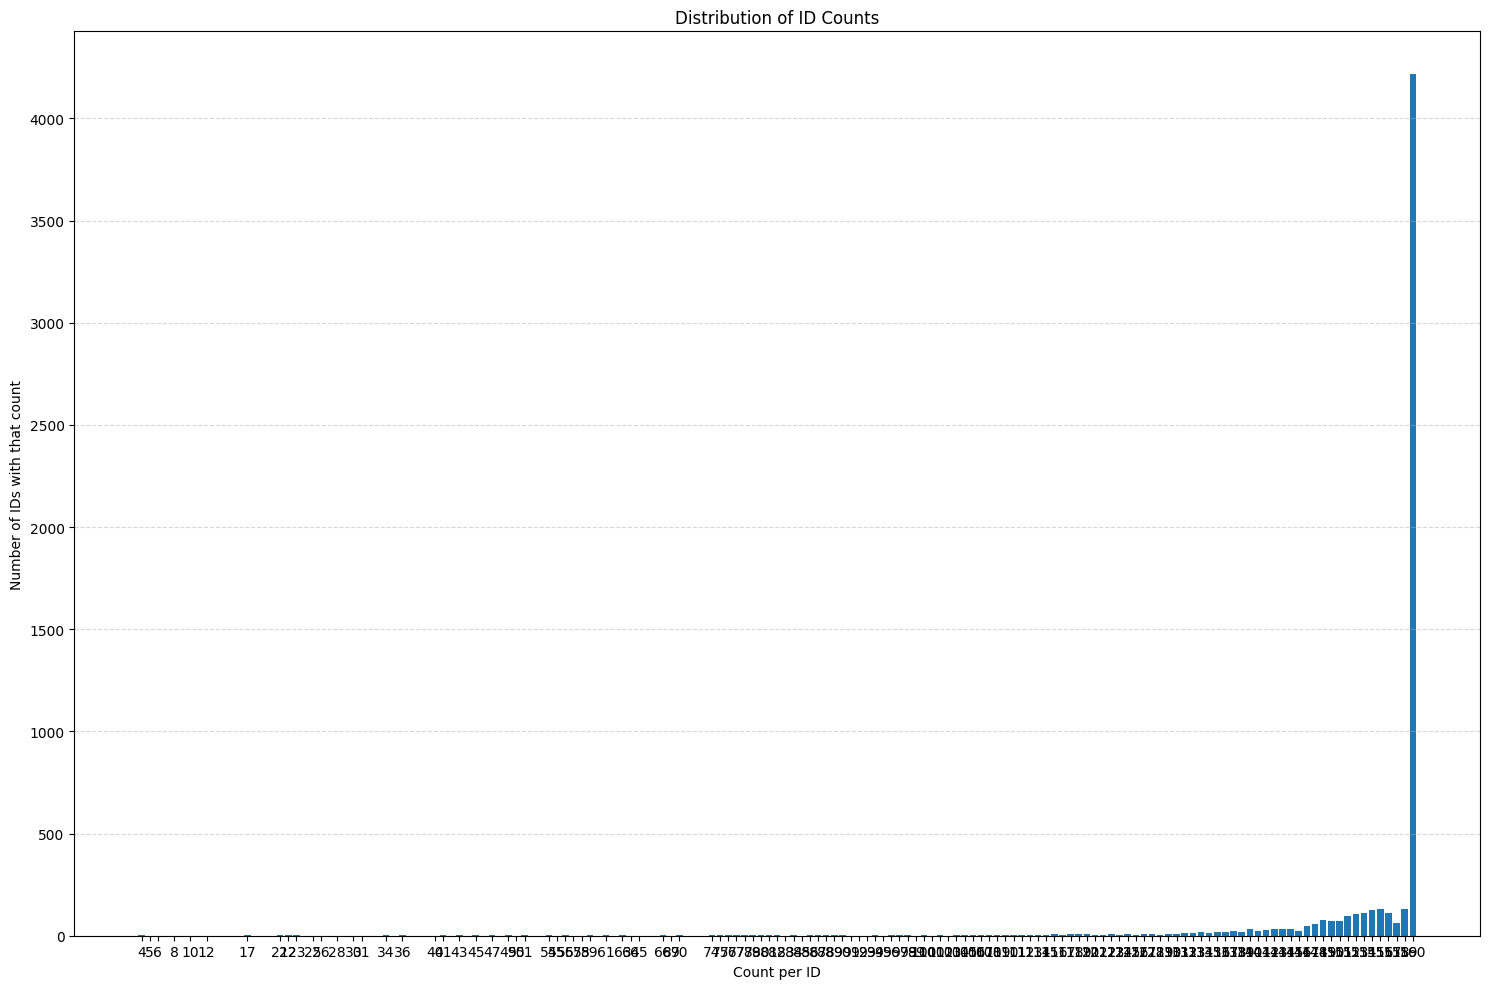

In [20]:
# id별 count
count_df = df2['bicycle_id'].value_counts().reset_index(name='count')
count_distribution = count_df['count'].value_counts().sort_index()

plt.figure(figsize=(15, 10))
plt.bar(count_distribution.index, count_distribution.values)
plt.xlabel('Count per ID')
plt.ylabel('Number of IDs with that count')
plt.title('Distribution of ID Counts')
plt.xticks(count_distribution.index)  # x축 눈금 정렬
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# df3: 시계열 visualize용 id, timestamp, lat, lon 열만 남기기

In [21]:
# df3: 시계열 visualize용 id, timestamp, lat, lon 열만 남기기
df3 = df2.copy()
df3 = df3[['bicycle_id', 'collected_time', 'lat', 'lng']].copy()
df3.columns = ['bicycle_id', 'timestamp', 'lat', 'lon']
df3 = df3.sort_values(['bicycle_id', 'timestamp'])
df3.to_csv("./data/gct_20250824_211810/mid/gct_df3.csv", index=False)
df3

,bicycle_id,timestamp,lat,lon
5651,3353,2025-08-24 21:18:54,37.570851,126.983391
11460,3353,2025-08-24 21:19:41,37.570851,126.983391
17269,3353,2025-08-24 21:20:29,37.570851,126.983391
23073,3353,2025-08-24 21:21:17,37.570851,126.983391
28878,3353,2025-08-24 21:22:03,37.570851,126.983391
...,...,...,...,...
804707,120722,2025-08-24 23:17:26,37.511400,127.087110
810560,120722,2025-08-24 23:18:15,37.511400,127.087110
816418,120722,2025-08-24 23:19:05,37.511400,127.087110
822285,120722,2025-08-24 23:19:51,37.511400,127.087110


# df4: id별 unique한 타임스탠프의 첫행만 남겨놓음 (움직인 애들만 추출)

### 움직인 애들만 추출하기

In [22]:
# df4: id별 unique한 타임스탠프의 첫행만 남겨놓음
mask4 = (df3['bicycle_id'] == df3['bicycle_id'].shift()) & \
       (df3['lat'] == df3['lat'].shift()) & \
       (df3['lon'] == df3['lon'].shift())

df4 = df3[~mask4].reset_index(drop=True)
df4.to_csv("./data/gct_20250824_211810/mid/gct_df4.csv", index=False)
df4

,bicycle_id,timestamp,lat,lon
0,3353,2025-08-24 21:18:54,37.570851,126.983391
1,6680,2025-08-24 21:18:26,37.546321,127.101217
2,6680,2025-08-24 21:29:32,37.546274,127.101246
3,6680,2025-08-24 21:44:43,37.546273,127.101242
4,6680,2025-08-24 21:59:10,37.546320,127.101261
...,...,...,...,...
65492,120722,2025-08-24 22:33:07,37.507328,127.095438
65493,120722,2025-08-24 22:40:26,37.507225,127.095518
65494,120722,2025-08-24 22:50:56,37.511385,127.087141
65495,120722,2025-08-24 23:05:38,37.511400,127.087110


# df5: id별 unique한 타임스탬프의 첫행과 마지막행만 남겨놓음

In [23]:
# df5: id별 unique한 타임스탬프의 첫행과 마지막행만 남겨놓음
mask5_prev = (
    (df3['bicycle_id'] == df3['bicycle_id'].shift()) &
    (df3['lat'] == df3['lat'].shift()) &
    (df3['lon'] == df3['lon'].shift())
)

mask5_next = (
    (df3['bicycle_id'] == df3['bicycle_id'].shift(-1)) &
    (df3['lat'] == df3['lat'].shift(-1)) &
    (df3['lon'] == df3['lon'].shift(-1))
)

redundant_middle = mask5_prev & mask5_next

df5 = df3[~redundant_middle].reset_index(drop=True)
df5.to_csv("./data/gct_20250824_211810/mid/gct_df5.csv", index=False)
df5

,bicycle_id,timestamp,lat,lon
0,3353,2025-08-24 21:18:54,37.570851,126.983391
1,3353,2025-08-24 23:36:02,37.570851,126.983391
2,6680,2025-08-24 21:18:26,37.546321,127.101217
3,6680,2025-08-24 21:28:45,37.546321,127.101217
4,6680,2025-08-24 21:29:32,37.546274,127.101246
...,...,...,...,...
128532,120722,2025-08-24 22:50:56,37.511385,127.087141
128533,120722,2025-08-24 23:04:50,37.511385,127.087141
128534,120722,2025-08-24 23:05:38,37.511400,127.087110
128535,120722,2025-08-24 23:19:51,37.511400,127.087110


# df6: id의 unique한 값들이 각각 몇번씩 나오는지. 즉, 측정 시간동안 자전거가 몇번이나 움직였는지

In [24]:
# df6: id의 unique한 값들이 각각 몇번씩 나오는지. 즉, 측정 시간동안 자전거가 몇번이나 움직였는지
df6 = df4.copy()
df6 = df6.groupby('bicycle_id').size().reset_index(name='count').sort_values(by='count', ascending=False)
df6.to_csv("./data/gct_20250824_211810/mid/gct_df6.csv", index=False)
df6

,bicycle_id,count
5834,118927,20
5886,119056,20
2365,85583,20
5513,118128,19
4286,100741,19
...,...,...
321,59739,1
678,66305,1
676,66299,1
323,60383,1


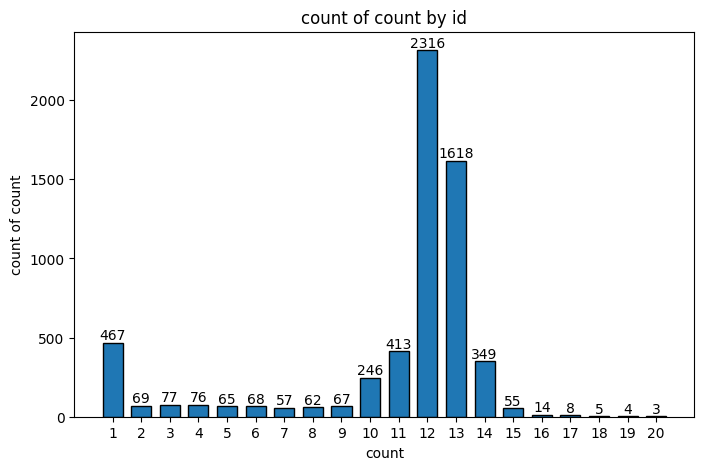

In [25]:
# count 값들의 빈도 분포
count_freq = df6['count'].value_counts().sort_index()

plt.figure(figsize=(8,5))
bars = plt.bar(count_freq.index, count_freq.values, width=0.7, edgecolor='black')

# x축 단위 1, 범위 1~20
plt.xticks(range(1, 21, 1))

# 막대 위에 y값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)),
             ha='center', va='bottom')

plt.xlabel("count")
plt.ylabel("count of count")
plt.title("count of count by id")
plt.show()

# df7: id별 움직인 총 거리

In [26]:
# df7: id별 움직인 총 거리
df7 = df2.copy()
df7['timestamp'] = pd.to_datetime(df7['collected_time'])

# 거리 계산 함수 정의 (Haversine 거리: km 단위)
def haversine_distance(lat1, lng1, lat2, lng2):
    R = 6371  # 지구 반지름 (km)
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lng2 - lng1)

    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# id별 이동 거리 계산
df7['lat_prev'] = df7.groupby('bicycle_id')['lat'].shift()
df7['lng_prev'] = df7.groupby('bicycle_id')['lng'].shift()

df7['dist_km'] = haversine_distance(
    df7['lat_prev'], df7['lng_prev'],
    df7['lat'], df7['lng']
)

# id별 총 이동 거리 계산
df7 = df7.groupby('bicycle_id')['dist_km'].sum().sort_values(ascending=False).reset_index(name='total_distance')
df7.to_csv("./data/gct_20250824_211810/mid/gct_df7.csv", index=False)
df7

,bicycle_id,total_distance
0,100358,8.967828
1,67742,7.672704
2,67595,7.208233
3,101126,6.999815
4,76893,6.701062
...,...,...
6034,62536,0.000000
6035,62560,0.000000
6036,62600,0.000000
6037,66481,0.000000


# df8: df2에서 시간을 제외한 unique한 데이터만 남기고 다 삭제. 열 정렬 완료

In [27]:
# df8: df2에서 시간을 제외한 unique한 데이터만 남기고 다 삭제. 열 정렬 완료
df8 = df2.copy()
compare_cols = [c for c in df2.columns if c not in ['collected_time', 'hour', 'minute', 'second']]
df8 = df8.drop_duplicates(subset=compare_cols, keep='first').reset_index(drop=True)
df8.to_csv("./data/gct_20250824_211810/mid/gct_df8.csv", index=False)
df8

,lat,lng,bicycle_id,region_id,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,movable_distance_value_km,collected_time,hour,minute,second
0,37.570851,126.983391,3353,955,True,59,IDLE,False,11,17,2025-08-24 21:18:54,21,18,54
1,37.546321,127.101217,6680,446,True,33,IDLE,False,11,9,2025-08-24 21:18:26,21,18,26
2,37.546274,127.101246,6680,446,True,33,IDLE,False,11,9,2025-08-24 21:29:32,21,29,32
3,37.546273,127.101242,6680,446,True,33,IDLE,False,11,9,2025-08-24 21:44:43,21,44,43
4,37.546320,127.101261,6680,446,True,33,IDLE,False,11,9,2025-08-24 21:59:10,21,59,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67409,37.507328,127.095438,120722,524,True,47,IDLE,False,18,14,2025-08-24 22:33:07,22,33,7
67410,37.507225,127.095518,120722,524,True,47,RIDING,False,18,14,2025-08-24 22:40:26,22,40,26
67411,37.511385,127.087141,120722,524,True,45,IDLE,False,18,13,2025-08-24 22:50:56,22,50,56
67412,37.511400,127.087110,120722,524,True,45,IDLE,False,18,13,2025-08-24 23:05:38,23,5,38


# df9_imsi: df2에서 연속된 두 점 사이의 실제 이동거리를 계산해서 10m 이하인 경우를 제거

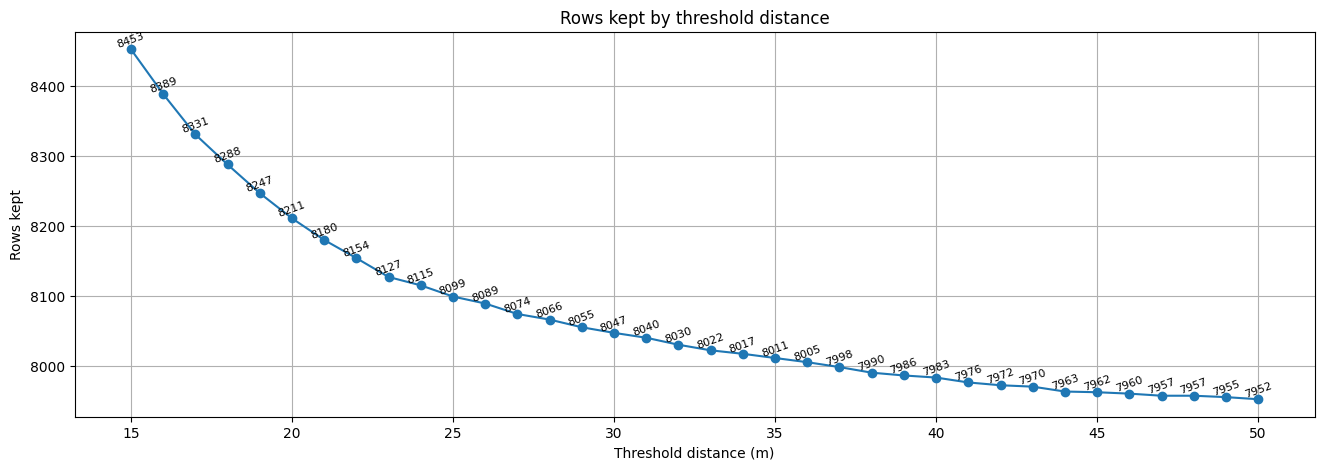

In [28]:
df9_imsi = df8.copy()

# 같은 id 내 직전 좌표 붙이기
df9_imsi['lat_prev'] = df9_imsi.groupby('bicycle_id')['lat'].shift()
df9_imsi['lng_prev'] = df9_imsi.groupby('bicycle_id')['lng'].shift()

# 4326 -> 5186 변환
tf = Transformer.from_crs(4326, 5186, always_xy=True)  # (lon, lat)

# 현재/이전 점을 5186 평면 좌표로 변환
x,  y  = tf.transform(df9_imsi['lng'].values, df9_imsi['lat'].values)
x0, y0 = tf.transform(df9_imsi['lng_prev'].values, df9_imsi['lat_prev'].values)

# 평면 거리 계산
df9_imsi['dist_5186_m'] = np.hypot(x - x0, y - y0)

# threshold별 남는 행 수 계산
results = []
for th in range(15, 51):
    keep = df9_imsi['dist_5186_m'].isna() | (df9_imsi['dist_5186_m'] > th)
    n_rows = keep.sum()
    results.append((th, n_rows))

df_thresholds = pd.DataFrame(results, columns=['threshold_m', 'rows_kept'])

plt.figure(figsize=(16,5))
plt.plot(df_thresholds['threshold_m'], df_thresholds['rows_kept'], marker='o')

for x, y in zip(df_thresholds['threshold_m'], df_thresholds['rows_kept']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8, rotation=20)

plt.xlabel("Threshold distance (m)")
plt.ylabel("Rows kept")
plt.title("Rows kept by threshold distance")
plt.grid(True)
plt.show()

# df9: df8에서 임계값 23m로 전처리 완료된 최종 데이터프레임 저장!

In [29]:
df9 = df8.copy()

# 같은 id 내 직전 좌표 붙이기
df9['lat_prev'] = df9.groupby('bicycle_id')['lat'].shift()
df9['lng_prev'] = df9.groupby('bicycle_id')['lng'].shift()

# 4326 -> 5186 변환
tf = Transformer.from_crs(4326, 5186, always_xy=True)  # (lon, lat)

# 현재/이전 점을 5186 평면 좌표로 변환
x,  y  = tf.transform(df9['lng'].values, df9['lat'].values)
x0, y0 = tf.transform(df9['lng_prev'].values, df9['lat_prev'].values)

# 평면 거리 계산
dist_m = np.hypot(x - x0, y - y0)
df9['dist_m'] = dist_m

# 보존 규칙: 첫 점(직전 없음) 보존, 그 외는 23m 초과만 보존
df9['keep'] = df9['dist_m'].isna() | (df9['dist_m'] > 23)

df9 = df9.loc[df9['keep']].drop(columns=['lat_prev','lng_prev', 'keep']).reset_index(drop=True)
df9.to_csv("./data/gct_20250824_211810/mid/gct_df10.csv", index=False)
df9

,lat,lng,bicycle_id,region_id,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,movable_distance_value_km,collected_time,hour,minute,second,dist_m
0,37.570851,126.983391,3353,955,True,59,IDLE,False,11,17,2025-08-24 21:18:54,21,18,54,NaN
1,37.546321,127.101217,6680,446,True,33,IDLE,False,11,9,2025-08-24 21:18:26,21,18,26,NaN
2,37.552868,127.090260,6680,446,True,100,IDLE,False,11,30,2025-08-24 23:00:07,23,0,7,1236.765593
3,37.553531,127.089977,6680,446,True,100,IDLE,False,11,30,2025-08-24 23:04:26,23,4,26,77.718105
4,37.570279,127.086240,6680,446,True,100,IDLE,False,11,30,2025-08-24 23:09:29,23,9,29,1887.927437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,37.507132,127.095595,120722,524,True,47,IDLE,False,18,14,2025-08-24 21:18:17,21,18,17,NaN
8123,37.507253,127.095246,120722,524,True,47,IDLE,False,18,14,2025-08-24 21:26:12,21,26,12,33.653210
8124,37.507074,127.095555,120722,524,True,47,IDLE,False,18,14,2025-08-24 22:10:48,22,10,48,32.722816
8125,37.507304,127.095355,120722,524,True,47,IDLE,False,18,14,2025-08-24 22:25:08,22,25,8,31.053733
